# Introduction
We have recieved dataset containing information phishing URLs. Dataset contains list of URLs, URL has SSL, URL allows SQL injection, URL have cert ver, URL allows inp val and whether URL is UNSAFE or not. We'll be dividing dataset into train, validation and test sets. Train set will be used for training and validation set for validation of trained model. We'll then use test set for testing once whole model has completed training.

We'll be trying LSTM and Dense Net for our purpose. We'll first tokenize data using various stratgies like count vectorizer, tfidf, frequency of words etc. We also have used first layer as embedding layer for our LSTM model to create embedding for words.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image

import keras
from keras.preprocessing import text
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Flatten
from keras.utils import plot_model

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/dataset_websites-3.csv


# Loading & Cleaning Data
We have loaded data in pandas dataframe and then we remove all rows which has any NAN to avoid issues during training.

In [2]:
df = pd.read_csv('/kaggle/input/dataset_websites-3.csv')
df = df.dropna()
print(df.shape)
df.head()

(998, 6)


,URL,HAVE_SSL,ALLOW_SQL_INJ,HAVE_CERT_VER,ALLOW_INP_VAL,UNSAFE
0,http://www.townsvilleoutriggers.org.au/uploads...,0.0,1.0,0.0,0.0,1.0
1,https://amzn-info.woebegone-mailbusiness.net/,0.0,1.0,0.0,0.0,1.0
2,https://azhelp.000webhostapp.com/help_login.htm,0.0,1.0,0.0,0.0,1.0
3,http://i2cnimwesterns.com/iniciar-sesion,0.0,1.0,0.0,0.0,1.0
4,https://astralis1.fun/,0.0,1.0,0.0,0.0,1.0


In [3]:
df.tail()

,URL,HAVE_SSL,ALLOW_SQL_INJ,HAVE_CERT_VER,ALLOW_INP_VAL,UNSAFE
995,http://kotaku.com/dragon-quest-viii-an-excelle...,1.0,0.0,1.0,1.0,0.0
996,http://kotaku.com/eight-months-later-destiny-p...,1.0,0.0,1.0,1.0,0.0
997,http://kotaku.com/how-video-game-breasts-are-m...,1.0,0.0,1.0,1.0,0.0
998,http://kotaku.com/nintendo-has-announced-its-e...,1.0,0.0,1.0,1.0,0.0
999,http://kotaku.com/previously-the-ceo-of-japane...,1.0,0.0,1.0,1.0,0.0


# Splitting Dataset into Train/Test Sets

In [4]:
X = df[['URL','HAVE_SSL','ALLOW_SQL_INJ','HAVE_CERT_VER','ALLOW_INP_VAL']].values
Y = df[['UNSAFE']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, stratify=Y, random_state=123)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Sizes :  (798, 5) (200, 5) (798, 1) (200, 1)


# Tokenizing Data
Toeknizing data involves creating tokenizer with number of words to keep in dictionary. We then use various tokenizing strategies like binray, count, frequency and tfidf to generate tokenized train/test sets.

In [5]:
tokenizer = text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train[:, 0])

In [6]:
X_train_bin = tokenizer.texts_to_matrix(X_train[:,0])
X_test_bin = tokenizer.texts_to_matrix(X_test[:,0])

X_train_bin = np.hstack((X_train_bin, X_train[:, 1:]))
X_test_bin = np.hstack((X_test_bin, X_test[:, 1:]))

X_train_cnt = tokenizer.texts_to_matrix(X_train[:,0], mode='count')
X_test_cnt = tokenizer.texts_to_matrix(X_test[:,0], mode='count')

X_train_cnt = np.hstack((X_train_cnt, X_train[:, 1:]))
X_test_cnt = np.hstack((X_test_cnt, X_test[:, 1:]))

X_train_freq = tokenizer.texts_to_matrix(X_train[:,0], mode='freq')
X_test_freq = tokenizer.texts_to_matrix(X_test[:,0], mode='freq')

X_train_freq = np.hstack((X_train_freq, X_train[:, 1:]))
X_test_freq = np.hstack((X_test_freq, X_test[:, 1:]))

X_train_tfidf = tokenizer.texts_to_matrix(X_train[:,0], mode='tfidf')
X_test_tfidf = tokenizer.texts_to_matrix(X_test[:,0], mode='tfidf')

X_train_tfidf = np.hstack((X_train_tfidf, X_train[:, 1:]))
X_test_tfidf = np.hstack((X_test_tfidf, X_test[:, 1:]))

# LSTM Model Creation

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         640512    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 772,225
Trainable params: 772,225
Non-trainable params: 0
_________________________________________________________________
None


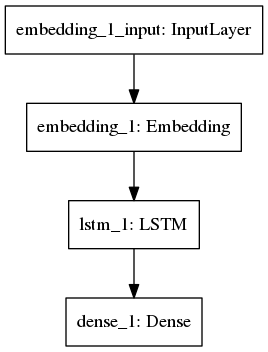

In [7]:
print('Build model...')
model = Sequential([Embedding(5004, 128),
                    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
                    Dense(1, activation='sigmoid')
                   ])
print(model.summary())
plot_model(model, to_file='model.png')
Image.open('model.png')

# Compiling Model
Compiling model involes initializing model with which optimizer to use, metrics on which to do evaluation and loss function to calculate loss function.

In [8]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on binary tokenized data.

In [9]:
%%time

hist = model.fit(X_train_bin, Y_train, batch_size=32, epochs=7, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/7
718/718 [==============================] - 93s 129ms/step - loss: 0.6048 - accuracy: 0.6643 - val_loss: 0.4737 - val_accuracy: 1.0000
Epoch 2/7
718/718 [==============================] - 90s 126ms/step - loss: 0.2699 - accuracy: 0.9777 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 3/7
718/718 [==============================] - 92s 128ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/7
718/718 [==============================] - 91s 126ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.8406e-04 - val_accuracy: 1.0000
Epoch 5/7
718/718 [==============================] - 90s 125ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.1965e-04 - val_accuracy: 1.0000
Epoch 6/7
718/718 [==============================] - 89s 124ms/step - loss: 9.0746e-04 - accuracy: 1.0000 - val_loss: 3.1240e-04 - val_accuracy: 1.0000
Epoch 7/7
718/718 [==============================] - 90s 125ms/step - loss:

# Evaluaing Model on Test Data.

In [10]:
loss, acc = model.evaluate(X_test_bin, Y_test, batch_size=64)
preds = model.predict_classes(X_test_bin)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 3s 15ms/step
Test Accuracy :  1.0
Test Loss: 0.00025118097197264434
Test accuracy: 1.0


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on count tokenized data.

In [11]:
%%time

hist = model.fit(X_train_cnt, Y_train, batch_size=32, epochs=7, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/7
718/718 [==============================] - 90s 125ms/step - loss: 5.5500e-04 - accuracy: 1.0000 - val_loss: 1.9740e-04 - val_accuracy: 1.0000
Epoch 2/7
718/718 [==============================] - 89s 124ms/step - loss: 4.6547e-04 - accuracy: 1.0000 - val_loss: 1.6106e-04 - val_accuracy: 1.0000
Epoch 3/7
718/718 [==============================] - 90s 125ms/step - loss: 3.5568e-04 - accuracy: 1.0000 - val_loss: 1.3370e-04 - val_accuracy: 1.0000
Epoch 4/7
718/718 [==============================] - 90s 125ms/step - loss: 3.6122e-04 - accuracy: 1.0000 - val_loss: 1.2012e-04 - val_accuracy: 1.0000
Epoch 5/7
718/718 [==============================] - 89s 124ms/step - loss: 2.6345e-04 - accuracy: 1.0000 - val_loss: 9.9721e-05 - val_accuracy: 1.0000
Epoch 6/7
718/718 [==============================] - 89s 124ms/step - loss: 2.6118e-04 - accuracy: 1.0000 - val_loss: 9.1413e-05 - val_accuracy: 1.0000
Epoch 7/7
718/718 [========================

# Evaluaing Model on Test Data.

In [12]:
loss, acc = model.evaluate(X_test_cnt, Y_test, batch_size=64)
preds = model.predict_classes(X_test_cnt)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 3s 15ms/step
Test Accuracy :  1.0
Test Loss: 7.828371250070631e-05
Test accuracy: 1.0


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on tfidf tokenized data.

In [13]:
%%time

hist = model.fit(X_train_tfidf, Y_train, batch_size=32, epochs=7, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/7
718/718 [==============================] - 89s 124ms/step - loss: 2.0142e-04 - accuracy: 1.0000 - val_loss: 7.0165e-05 - val_accuracy: 1.0000
Epoch 2/7
718/718 [==============================] - 89s 125ms/step - loss: 1.8098e-04 - accuracy: 1.0000 - val_loss: 6.1783e-05 - val_accuracy: 1.0000
Epoch 3/7
718/718 [==============================] - 90s 126ms/step - loss: 1.5168e-04 - accuracy: 1.0000 - val_loss: 5.5504e-05 - val_accuracy: 1.0000
Epoch 4/7
718/718 [==============================] - 90s 125ms/step - loss: 1.4266e-04 - accuracy: 1.0000 - val_loss: 5.1476e-05 - val_accuracy: 1.0000
Epoch 5/7
718/718 [==============================] - 90s 126ms/step - loss: 1.3356e-04 - accuracy: 1.0000 - val_loss: 4.7427e-05 - val_accuracy: 1.0000
Epoch 6/7
718/718 [==============================] - 91s 126ms/step - loss: 1.2406e-04 - accuracy: 1.0000 - val_loss: 4.3852e-05 - val_accuracy: 1.0000
Epoch 7/7
718/718 [========================

# Evaluaing Model on Test Data.

In [14]:
loss, acc = model.evaluate(X_test_tfidf, Y_test, batch_size=64)
preds = model.predict_classes(X_test_tfidf)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 3s 15ms/step
Test Accuracy :  1.0
Test Loss: 3.96868065581657e-05
Test accuracy: 1.0


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on freq tokenized data.

In [15]:
%%time

hist = model.fit(X_train_freq, Y_train, batch_size=32, epochs=7, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/7
718/718 [==============================] - 88s 122ms/step - loss: 1.0271e-04 - accuracy: 1.0000 - val_loss: 3.8185e-05 - val_accuracy: 1.0000
Epoch 2/7
718/718 [==============================] - 88s 122ms/step - loss: 9.1787e-05 - accuracy: 1.0000 - val_loss: 3.3510e-05 - val_accuracy: 1.0000
Epoch 3/7
718/718 [==============================] - 88s 123ms/step - loss: 9.2461e-05 - accuracy: 1.0000 - val_loss: 3.1805e-05 - val_accuracy: 1.0000
Epoch 4/7
718/718 [==============================] - 88s 122ms/step - loss: 8.0230e-05 - accuracy: 1.0000 - val_loss: 2.9371e-05 - val_accuracy: 1.0000
Epoch 5/7
718/718 [==============================] - 87s 121ms/step - loss: 7.2945e-05 - accuracy: 1.0000 - val_loss: 2.7217e-05 - val_accuracy: 1.0000
Epoch 6/7
718/718 [==============================] - 88s 123ms/step - loss: 6.9534e-05 - accuracy: 1.0000 - val_loss: 2.5723e-05 - val_accuracy: 1.0000
Epoch 7/7
718/718 [========================

# Evaluaing Model on Test Data.

In [16]:
loss, acc = model.evaluate(X_test_freq, Y_test, batch_size=64)
preds = model.predict_classes(X_test_freq)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 3s 15ms/step
Test Accuracy :  1.0
Test Loss: 2.456029615132138e-05
Test accuracy: 1.0


# Densenet Model Creation

Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1281280   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,322,497
Trainable params: 1,322,497
Non-trainable params: 0
_________________________________________________________________
None


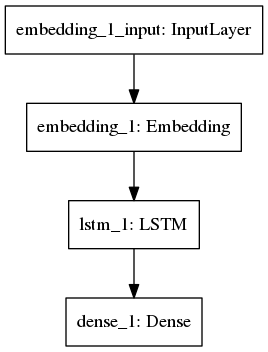

In [17]:
print('Build model...')
dense_model = Sequential( [Dense(256, activation='relu', input_shape=(5004,)),
                           Dense(128, activation='relu'),
                           Dense(64,activation='relu'),
                           Dense(1, activation='sigmoid')]
                  )
print(dense_model.summary())
plot_model(model, to_file='dense_model.png')
Image.open('dense_model.png')

# Compile DenseNet

In [18]:
# try using different optimizers and different optimizer configs
dense_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on bin tokenized data.

In [19]:
%%time

hist = dense_model.fit(X_train_bin, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/5
718/718 [==============================] - 1s 853us/step - loss: 0.4512 - accuracy: 0.9457 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 2/5
718/718 [==============================] - 0s 479us/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/5
718/718 [==============================] - 0s 477us/step - loss: 2.1661e-04 - accuracy: 1.0000 - val_loss: 5.5915e-04 - val_accuracy: 1.0000
Epoch 4/5
718/718 [==============================] - 0s 495us/step - loss: 9.2049e-05 - accuracy: 1.0000 - val_loss: 4.4512e-04 - val_accuracy: 1.0000
Epoch 5/5
718/718 [==============================] - 0s 480us/step - loss: 7.4974e-05 - accuracy: 1.0000 - val_loss: 4.1012e-04 - val_accuracy: 1.0000
CPU times: user 2.85 s, sys: 88 ms, total: 2.94 s
Wall time: 2.76 s


# Evaluaing Model on Test Data.

In [20]:
loss, acc = dense_model.evaluate(X_test_bin, Y_test, batch_size=64)
preds = dense_model.predict_classes(X_test_bin)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 376us/step
Test Accuracy :  1.0
Test Loss: 0.0003397325378318783
Test accuracy: 1.0


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on tfidf count data.

In [21]:
%%time

hist = dense_model.fit(X_train_cnt, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/5
718/718 [==============================] - 0s 532us/step - loss: 6.2313e-05 - accuracy: 1.0000 - val_loss: 4.2597e-04 - val_accuracy: 1.0000
Epoch 2/5
718/718 [==============================] - 0s 483us/step - loss: 5.4454e-05 - accuracy: 1.0000 - val_loss: 3.9870e-04 - val_accuracy: 1.0000
Epoch 3/5
718/718 [==============================] - 0s 477us/step - loss: 4.8055e-05 - accuracy: 1.0000 - val_loss: 3.7486e-04 - val_accuracy: 1.0000
Epoch 4/5
718/718 [==============================] - 0s 495us/step - loss: 4.2458e-05 - accuracy: 1.0000 - val_loss: 3.5483e-04 - val_accuracy: 1.0000
Epoch 5/5
718/718 [==============================] - 0s 478us/step - loss: 3.7757e-05 - accuracy: 1.0000 - val_loss: 3.3837e-04 - val_accuracy: 1.0000
CPU times: user 1.86 s, sys: 100 ms, total: 1.96 s
Wall time: 1.78 s


# Evaluaing Model on Test Data.

In [22]:
loss, acc = dense_model.evaluate(X_test_cnt, Y_test, batch_size=64)
preds = dense_model.predict_classes(X_test_cnt)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 384us/step
Test Accuracy :  1.0
Test Loss: 0.0003550781092781108
Test accuracy: 1.0


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on tfidf tokenized data.

In [23]:
%%time

hist = dense_model.fit(X_train_tfidf, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/5
718/718 [==============================] - 0s 506us/step - loss: 1.5537e-07 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/5
718/718 [==============================] - 0s 500us/step - loss: 1.2837e-07 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/5
718/718 [==============================] - 0s 477us/step - loss: 1.1515e-07 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/5
718/718 [==============================] - 0s 487us/step - loss: 1.0843e-07 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/5
718/718 [==============================] - 0s 494us/step - loss: 1.0294e-07 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
CPU times: user 1.88 s, sys: 88 ms, total: 1.97 s
Wall time: 1.78 s


# Evaluaing Model on Test Data.

In [24]:
loss, acc = dense_model.evaluate(X_test_tfidf, Y_test, batch_size=64)
preds = dense_model.predict_classes(X_test_tfidf)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 376us/step
Test Accuracy :  0.995
Test Loss: 0.007596669144398032
Test accuracy: 0.9950000047683716


# Training Model
We'll be training model on train data and taking 10% of that data as validation data for doing evaluation of model performance after each epochs. We have set batch size as 32 samples and epochs as 7. Training is done on frequency tokenized data.

In [25]:
%%time

hist = dense_model.fit(X_train_freq, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Train on 718 samples, validate on 80 samples
Epoch 1/5
718/718 [==============================] - 0s 509us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.1515e-04 - val_accuracy: 1.0000
Epoch 2/5
718/718 [==============================] - 0s 496us/step - loss: 2.2362e-04 - accuracy: 1.0000 - val_loss: 1.2804e-04 - val_accuracy: 1.0000
Epoch 3/5
718/718 [==============================] - 0s 473us/step - loss: 7.9961e-05 - accuracy: 1.0000 - val_loss: 7.1456e-05 - val_accuracy: 1.0000
Epoch 4/5
718/718 [==============================] - 0s 486us/step - loss: 4.9682e-05 - accuracy: 1.0000 - val_loss: 5.0267e-05 - val_accuracy: 1.0000
Epoch 5/5
718/718 [==============================] - 0s 501us/step - loss: 3.6109e-05 - accuracy: 1.0000 - val_loss: 3.8517e-05 - val_accuracy: 1.0000
CPU times: user 1.87 s, sys: 96 ms, total: 1.97 s
Wall time: 1.78 s


# Evaluaing Model on Test Data.

In [26]:
loss, acc = dense_model.evaluate(X_test_freq, Y_test, batch_size=64)
preds = dense_model.predict_classes(X_test_freq)

print('Test Accuracy : ', accuracy_score(Y_test, preds))
print('Test Loss:', loss)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 374us/step
Test Accuracy :  1.0
Test Loss: 2.9342782363528384e-05
Test accuracy: 1.0
